In [48]:
# load libraries
require(mosaic)
trellis.par.set(theme=col.mosaic())
options(digits=3)

In [71]:
# load data sets
one <- data.frame(x=c(2.2, 8.4, 3.6, 7.8, 1.2, 4.6, 5.1, 3, .4, 1.7),
                  y=c(15.2, 847.6, 66.8, 678.9, 2.6, 140.5, 190.2, 37.8, .092, 7.1))
two <- data.frame(x=c(1.6, 2.5, 7.6, 5.6, 1.9, 8.2, 3.3, 10.6, .8, 5.4),
                  y=c(-.3, -2, -13.15, -8.8, -.69, -14.44, -3.74, -19.8, 1.8, -8.17))
three <- data.frame(x=c(.47, 3.1, 2.6, 1.5, 3.5, 1.8, .4, 1.2, 2.7, .64),
                    y=c(1.05, 3.1, 2.5, 1.6, 3.6, 1.8, 1.01, 1.42, 2.6, 1.13))

# add columns
one$logx <- log10(one$x)
one$logy <- log10(one$y)

three$logy <- log10(three$y)

In [72]:
# make models
one.m <- lm(logy ~ logx, data=one)
two.m <- lm(y ~ x, data=two)
three.m <- lm(logy ~ x, data=three)

# turn models to functions
one.f <- makeFun(one.m)
two.f <- makeFun(two.m)
three.f <- makeFun(three.m)

x,y,logx,logy,logyhat,resid
2.2,15.200,0.3424,1.182,1.186,-0.003967
8.4,847.600,0.9243,2.928,2.927,0.000761
3.6,66.800,0.5563,1.825,1.826,-0.001222
7.8,678.900,0.8921,2.832,2.831,0.000711
1.2,2.600,0.0792,0.415,0.398,0.017099
4.6,140.500,0.6628,2.148,2.145,0.003035
5.1,190.200,0.7076,2.279,2.279,0.000436
3.0,37.800,0.4771,1.577,1.589,-0.011500
0.4,0.092,-0.3979,-1.036,-1.030,-0.005962
1.7,7.100,0.2304,0.851,0.851,0.000608


[1] 4.11e-15

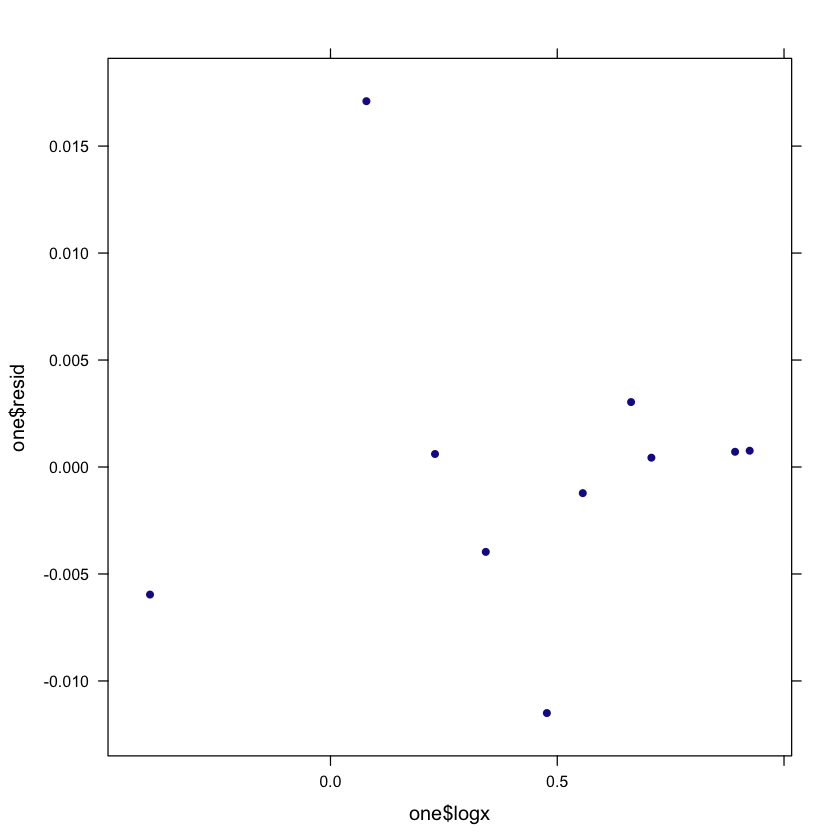

In [78]:
# add residuals

# 1.
one$logyhat <- one.f(one$logx)
one$resid <- (one$logy - one$logyhat)
one
sum(one$resid)
xyplot(one$resid ~ one$logx)

x,y,yhat,resid
1.6,-0.30,-0.0468,-0.25321
2.5,-2.00,-2.0131,0.01313
7.6,-13.15,-13.1558,0.00576
5.6,-8.80,-8.7861,-0.01390
1.9,-0.69,-0.7022,0.01224
8.2,-14.44,-14.4667,0.02666
3.3,-3.74,-3.7610,0.02100
10.6,-19.80,-19.7103,-0.08975
0.8,1.80,1.7011,0.09892
5.4,-8.17,-8.3491,0.17914


[1] 9.44e-16

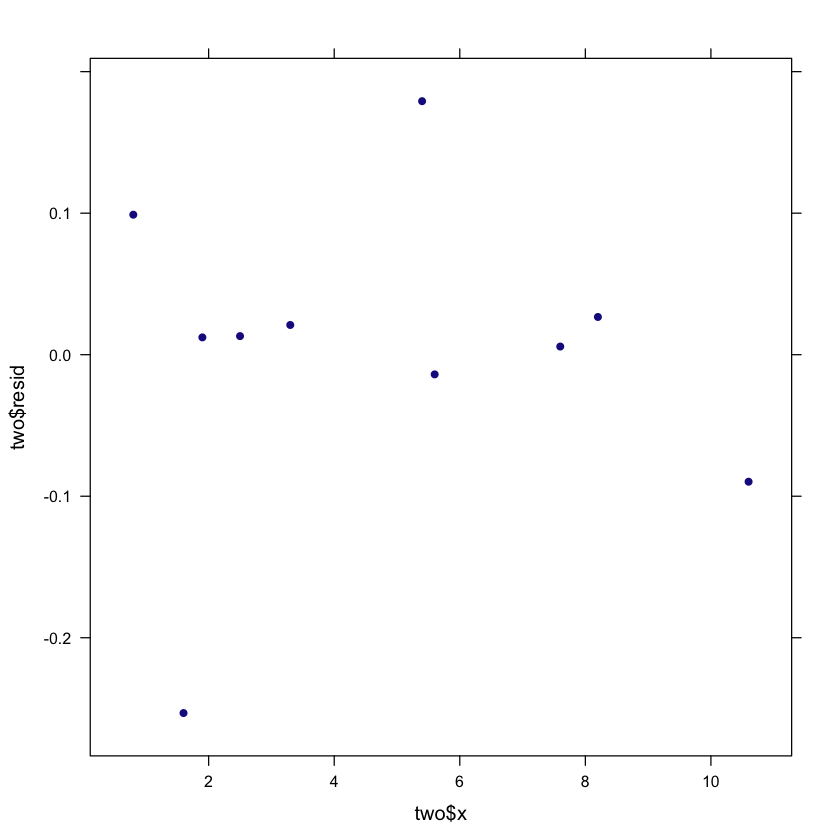

In [77]:
# 2.
two$yhat <- two.f(two$x)
two$resid <- (two$y - two$yhat)
two
sum(two$resid)
xyplot(two$resid ~ two$x)

x,y,logy,logyhat,resid
0.47,1.05,0.02119,0.02060,0.000591
3.10,3.10,0.49136,0.48744,0.003921
2.60,2.50,0.39794,0.39869,-0.000748
1.50,1.60,0.20412,0.20343,0.000690
3.50,3.60,0.55630,0.55844,-0.002141
1.80,1.80,0.25527,0.25668,-0.001410
0.40,1.01,0.00432,0.00817,-0.003851
1.20,1.42,0.15229,0.15018,0.002110
2.70,2.60,0.41497,0.41644,-0.001465
0.64,1.13,0.05308,0.05077,0.002304


[1] 7.62e-16

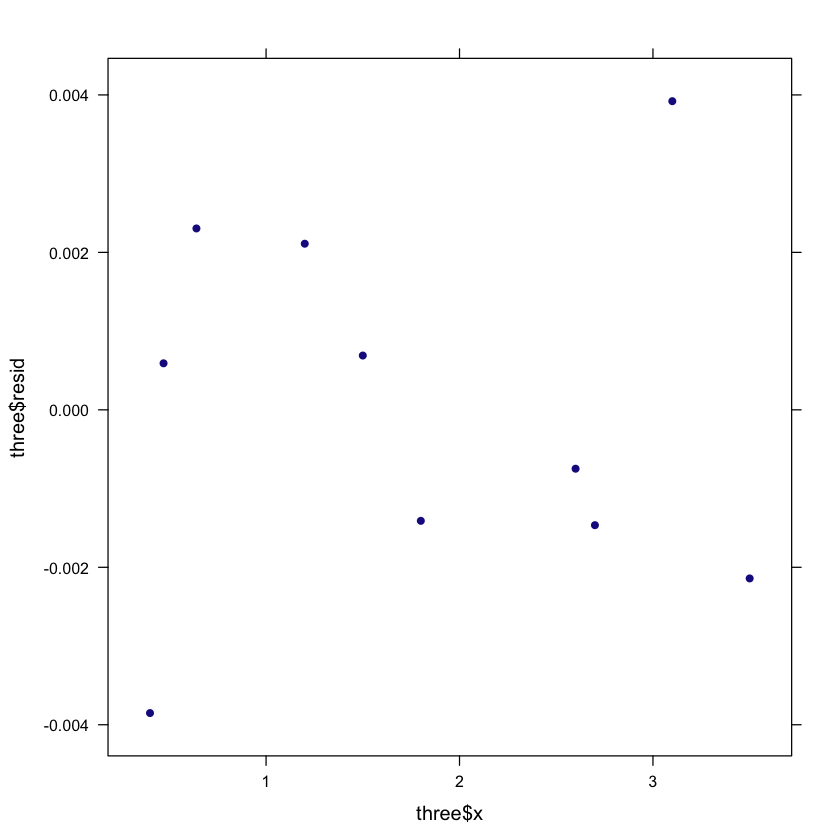

In [80]:
# 3.
three$logyhat <- three.f(three$x)
three$resid <- (three$logy - three$logyhat)
three
sum(three$resid)
xyplot(three$resid ~ three$x)